## Three Stock Monte

This exercise tests your ability to retrieve stock price data using the Alpaca API and simulate multiple portfolio compositions using Monte Carlo Simulation.

### Import Dependencies

In [10]:
# Import libraries and dependencies
import os
import pandas as pd
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

In [11]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv("keys.env")

True

In [12]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

### Get Past ~4 Year's Worth of Stock Price Data via Alpaca API Call

In [19]:
# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes between now and 4 years ago.
start_date = pd.Timestamp("2017-05-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-05-01", tz="America/New_York").isoformat()

# Set the ticker information
tickers = ["T","NKE","XOM"]

# Get approximately 4 year's worth of historical price data
df_ticker = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Display sample data
df_ticker.head()

NKE                                     T         \
                            open   high    low  close    volume   open   high   
time                                                                            
2017-05-11 00:00:00-04:00  54.52  54.52  53.40  54.23   5331669  38.45  38.55   
2017-05-12 00:00:00-04:00  54.10  54.39  53.79  54.19   4487119  38.49  38.61   
2017-05-15 00:00:00-04:00  54.12  54.20  53.68  53.77   5801248  38.52  38.69   
2017-05-16 00:00:00-04:00  52.37  53.38  52.12  52.77  12791404  38.68  38.76   
2017-05-17 00:00:00-04:00  52.39  52.87  51.84  51.88  15935519  37.98  38.04   

                                                       XOM                  \
                               low  close    volume   open     high    low   
time                                                                         
2017-05-11 00:00:00-04:00  38.2149  38.44  12628403  82.59  82.7100  82.10   
2017-05-12 00:00:00-04:00  38.3100  38.48  11170853  82.39  82.7100  82.25   
2017-05-15 00:00:00-04:00  38.4100  38.58  17025713  83.00  83.1829  82.65   
2017-05-16 00:00:00-04:00  38.1900  38.19  17363647  82.90  83.2300  82.45   
2017-05-17 00:00:00-04:00  37.4500  37.47  25230143  82.27  83.0400  81.96   

                                           
                           close   volume  
time                                       
2017-05-11 00:00:00-04:00  82.62  8067883  
2017-05-12 00:00:00-04:00  82.53  5480113  
2017-05-15 00:00:00-04:00  82.81  7740156  
2017-05-16 00:00:00-04:00  82.53  7864330  
2017-05-17 00:00:00-04:00  82.02  7943880

### Simulate five year portfolio growth with evenly-distributed stock investments

In [22]:
# Configure a Monte Carlo simulation to forecast five years cumulative returns
# YOUR CODE HERE!
MC_even_dist = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.33,.33,.33],
    num_simulation = 500,
    num_trading_days = 252*5
)
# Print the simulation input data
MC_even_dist.portfolio_data.head()

NKE                                              \
                            open   high    low  close    volume daily_return   
time                                                                           
2017-05-11 00:00:00-04:00  54.52  54.52  53.40  54.23   5331669          NaN   
2017-05-12 00:00:00-04:00  54.10  54.39  53.79  54.19   4487119    -0.000738   
2017-05-15 00:00:00-04:00  54.12  54.20  53.68  53.77   5801248    -0.007751   
2017-05-16 00:00:00-04:00  52.37  53.38  52.12  52.77  12791404    -0.018598   
2017-05-17 00:00:00-04:00  52.39  52.87  51.84  51.88  15935519    -0.016866   

                               T                                   \
                            open   high      low  close    volume   
time                                                                
2017-05-11 00:00:00-04:00  38.45  38.55  38.2149  38.44  12628403   
2017-05-12 00:00:00-04:00  38.49  38.61  38.3100  38.48  11170853   
2017-05-15 00:00:00-04:00  38.52  38.69  38.4100  38.58  17025713   
2017-05-16 00:00:00-04:00  38.68  38.76  38.1900  38.19  17363647   
2017-05-17 00:00:00-04:00  37.98  38.04  37.4500  37.47  25230143   

                                          XOM                                  \
                          daily_return   open     high    low  close   volume   
time                                                                            
2017-05-11 00:00:00-04:00          NaN  82.59  82.7100  82.10  82.62  8067883   
2017-05-12 00:00:00-04:00     0.001041  82.39  82.7100  82.25  82.53  5480113   
2017-05-15 00:00:00-04:00     0.002599  83.00  83.1829  82.65  82.81  7740156   
2017-05-16 00:00:00-04:00    -0.010109  82.90  83.2300  82.45  82.53  7864330   
2017-05-17 00:00:00-04:00    -0.018853  82.27  83.0400  81.96  82.02  7943880   

                                        
                          daily_return  
time                                    
2017-05-11 00:00:00-04:00          NaN  
2017-05-12 00:00:00-04:00    -0.001089  
2017-05-15 00:00:00-04:00     0.003393  
2017-05-16 00:00:00-04:00    -0.003381  
2017-05-17 00:00:00-04:00    -0.006180

In [24]:
# Run a Monte Carlo simulation to forecast five years cumulative returns
# YOUR CODE HERE!
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/anthonysegovia/Desktop/Miami_Bootcamp_Personal/01-Lesson-Plans/05-APIs/3/Activities/04-Stu_Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.993659,1.000060,0.996419,1.012603,0.993752,1.012687,0.984267,0.987365,1.001409,1.001834,...,1.005514,1.001836,0.986197,0.995426,0.993877,0.985973,0.998819,1.001354,0.984561,1.006826
2,1.008745,1.010953,1.006672,1.016718,0.992508,1.005255,0.993231,0.969538,0.998456,0.998607,...,0.997894,1.000656,1.003200,0.995419,0.995538,0.986429,1.003402,1.018423,0.998813,1.003248
3,1.004954,1.019301,1.003901,1.012954,0.989889,0.979723,0.984419,0.964636,1.003420,1.001456,...,1.001685,0.995430,0.997887,0.983241,1.001131,0.984051,0.994980,1.020226,0.988547,0.996279
4,1.016365,0.995410,1.007325,1.003766,1.004123,0.991746,1.011193,0.955241,0.987928,1.002772,...,1.016730,0.997998,0.998007,0.979439,0.994360,0.991229,1.006397,1.027834,0.984313,0.996239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.621276,1.916011,1.153764,0.920565,1.155501,1.419416,2.136950,1.213564,1.262576,0.799487,...,1.316526,1.011785,1.345804,0.850823,1.332914,2.052969,1.162569,1.107809,2.300614,0.544051
1257,1.627544,1.920147,1.153530,0.907657,1.149831,1.439045,2.145524,1.230935,1.250652,0.806905,...,1.305192,1.002574,1.359753,0.850965,1.342837,2.065628,1.175823,1.130718,2.332906,0.552081
1258,1.591335,1.911938,1.141730,0.889721,1.133058,1.410038,2.156170,1.225371,1.254971,0.812277,...,1.311663,0.994128,1.381171,0.855284,1.345282,2.078009,1.179627,1.111850,2.368660,0.549275
1259,1.589310,1.957682,1.136591,0.883143,1.133081,1.415863,2.147070,1.225180,1.259613,0.802483,...,1.324317,0.988635,1.399959,0.840339,1.359170,2.074139,1.191885,1.102992,2.403620,0.552149


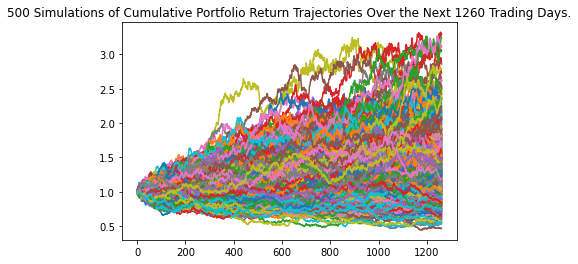

In [25]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()


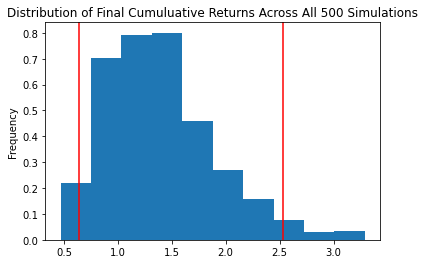

In [26]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_even_dist.plot_distribution()

In [9]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
print(even_tbl)

count           1000.000000
mean               1.256425
std                0.664969
min                0.238778
25%                0.809166
50%                1.107258
75%                1.560651
max                4.948870
95% CI Lower       0.424547
95% CI Upper       2.891867
Name: 1260, dtype: float64


In [10]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $15,000 investments stocks
# YOUR CODE HERE!

# Print results
# YOUR CODE HERE!

There is a 95% chance that an initial investment of $15,000 in the portfolio over the next 5 years will end within in the range of $6368.2 and $43378.01.


### Simulate five year portfolio growth with 60% AT&T stock

In [11]:
# Configure a Monte Carlo simulation to forecast five years cumulative returns with 60% AT&T stock
# YOUR CODE HERE!

# Print the simulation input data
MC_att.portfolio_data.head()

NKE                                   \
                             open    high     low   close   volume   
2015-05-01 00:00:00-04:00  49.940  50.410  49.705  50.385  5715970   
2015-05-04 00:00:00-04:00  50.500  50.600  50.242  50.410  3606368   
2015-05-05 00:00:00-04:00  50.215  50.435  50.130  50.205  3948804   
2015-05-06 00:00:00-04:00  50.135  50.500  25.010  50.125  4612302   
2015-05-07 00:00:00-04:00  25.005  50.795  25.005  50.730  4586904   

                                            T                                  \
                          daily_return   open   high    low   close    volume   
2015-05-01 00:00:00-04:00          NaN  34.56  34.72  34.13  34.420  28678372   
2015-05-04 00:00:00-04:00     0.000496  34.41  34.71  34.25  34.530  18684532   
2015-05-05 00:00:00-04:00    -0.004067  34.49  34.58  33.66  33.720  29405889   
2015-05-06 00:00:00-04:00    -0.001593  33.71  33.79  33.08  33.395  27386910   
2015-05-07 00:00:00-04:00     0.012070  33.25  33.56  33.11  33.370  19815760   

                                          XOM                                  \
                          daily_return   open   high    low   close    volume   
2015-05-01 00:00:00-04:00          NaN  87.85  88.95  87.70  88.840  10232059   
2015-05-04 00:00:00-04:00     0.003196  89.42  89.88  88.95  89.090   8023849   
2015-05-05 00:00:00-04:00    -0.023458  89.97  90.09  88.52  88.615   9605254   
2015-05-06 00:00:00-04:00    -0.009638  89.65  89.96  87.79  88.220   9280271   
2015-05-07 00:00:00-04:00    -0.000749  88.00  88.10  86.92  87.610   8034370   

                                        
                          daily_return  
2015-05-01 00:00:00-04:00          NaN  
2015-05-04 00:00:00-04:00     0.002814  
2015-05-05 00:00:00-04:00    -0.005332  
2015-05-06 00:00:00-04:00    -0.004457  
2015-05-07 00:00:00-04:00    -0.006915

In [12]:
# Run a Monte Carlo simulation to forecast five years cumulative returns with 60% AT&T stock
# YOUR CODE HERE!

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.007179,1.001071,1.009911,0.993953,1.008990,1.016508,0.992315,0.998519,1.000378,0.986386,...,1.009526,0.995735,1.005570,0.992377,1.010393,1.002816,0.997320,0.975535,1.014104,1.011562
2,0.987854,0.998218,1.024249,0.996246,1.006581,1.023215,0.998669,1.004950,0.990778,0.979481,...,0.994294,0.987824,0.997889,0.998228,0.993702,0.986023,1.011278,0.968056,0.985366,0.999679
3,0.978646,1.000643,1.021904,0.978792,0.998788,1.012164,0.976612,1.016297,0.988529,0.991277,...,1.006779,0.992586,0.992813,1.002298,0.984394,0.988149,0.999124,0.973540,0.975218,0.988654
4,0.980619,1.013951,1.024559,0.991268,0.970460,0.999743,0.979672,1.009884,0.980018,1.004356,...,1.002955,0.984498,1.005453,0.981663,0.967316,0.998256,0.988700,0.966237,0.971791,1.003659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.899120,1.501147,0.683574,0.646879,0.911791,1.269855,0.669194,0.585280,1.561898,1.252216,...,1.553991,1.570848,1.314610,1.445869,0.790565,0.647515,0.923911,0.819601,1.597872,1.995949
1257,0.895756,1.505680,0.676517,0.647283,0.910181,1.272016,0.663447,0.585230,1.559504,1.256838,...,1.535960,1.538123,1.311226,1.431432,0.786318,0.643923,0.917700,0.813304,1.576138,1.974007
1258,0.898583,1.506342,0.680487,0.656484,0.919278,1.264797,0.659258,0.578823,1.542838,1.270933,...,1.528475,1.555371,1.304215,1.421976,0.792815,0.632763,0.902592,0.804737,1.587492,1.988099
1259,0.894009,1.504111,0.671608,0.672412,0.925827,1.264849,0.670645,0.570786,1.533105,1.290114,...,1.520751,1.573384,1.304515,1.415406,0.794759,0.639720,0.912016,0.797164,1.587309,1.970436


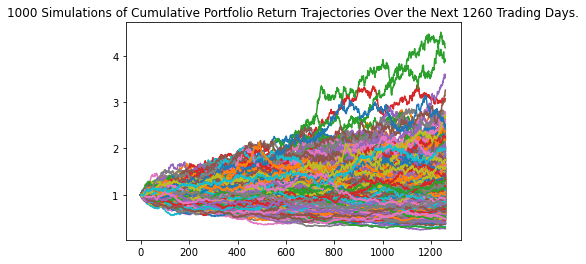

In [13]:
# Plot simulation outcomes
# YOUR CODE HERE!

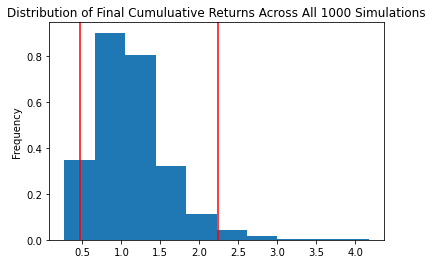

In [14]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [15]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
print(att_tbl)

count           1000.000000
mean               1.121999
std                0.468175
min                0.268142
25%                0.794749
50%                1.059438
75%                1.353507
max                4.172017
95% CI Lower       0.464606
95% CI Upper       2.245501
Name: 1260, dtype: float64


In [16]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $15,000 investments
# YOUR CODE HERE!

# Print results
# YOUR CODE HERE!

There is a 95% chance that an initial investment of $15,000 in the portfolio over the next 5 years will end within in the range of $6969.09 and $33682.52.


### Simulate five year portfolio growth with 60% Nike stock

In [17]:
# Configure a Monte Carlo simulation to forecast five years cumulative returns with 60% Nike stock
# YOUR CODE HERE!

# Printing the simulation input data
MC_nike.portfolio_data.head()

NKE                                   \
                             open    high     low   close   volume   
2015-05-01 00:00:00-04:00  49.940  50.410  49.705  50.385  5715970   
2015-05-04 00:00:00-04:00  50.500  50.600  50.242  50.410  3606368   
2015-05-05 00:00:00-04:00  50.215  50.435  50.130  50.205  3948804   
2015-05-06 00:00:00-04:00  50.135  50.500  25.010  50.125  4612302   
2015-05-07 00:00:00-04:00  25.005  50.795  25.005  50.730  4586904   

                                            T                                  \
                          daily_return   open   high    low   close    volume   
2015-05-01 00:00:00-04:00          NaN  34.56  34.72  34.13  34.420  28678372   
2015-05-04 00:00:00-04:00     0.000496  34.41  34.71  34.25  34.530  18684532   
2015-05-05 00:00:00-04:00    -0.004067  34.49  34.58  33.66  33.720  29405889   
2015-05-06 00:00:00-04:00    -0.001593  33.71  33.79  33.08  33.395  27386910   
2015-05-07 00:00:00-04:00     0.012070  33.25  33.56  33.11  33.370  19815760   

                                          XOM                                  \
                          daily_return   open   high    low   close    volume   
2015-05-01 00:00:00-04:00          NaN  87.85  88.95  87.70  88.840  10232059   
2015-05-04 00:00:00-04:00     0.003196  89.42  89.88  88.95  89.090   8023849   
2015-05-05 00:00:00-04:00    -0.023458  89.97  90.09  88.52  88.615   9605254   
2015-05-06 00:00:00-04:00    -0.009638  89.65  89.96  87.79  88.220   9280271   
2015-05-07 00:00:00-04:00    -0.000749  88.00  88.10  86.92  87.610   8034370   

                                        
                          daily_return  
2015-05-01 00:00:00-04:00          NaN  
2015-05-04 00:00:00-04:00     0.002814  
2015-05-05 00:00:00-04:00    -0.005332  
2015-05-06 00:00:00-04:00    -0.004457  
2015-05-07 00:00:00-04:00    -0.006915

In [18]:
# Run a Monte Carlo simulation to forecast five years cumulative returns with 60% Nike stock
# YOUR CODE HERE!

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.990217,1.004211,0.992131,0.979432,1.020860,0.975622,0.997566,0.986012,1.013766,1.031683,...,1.014219,0.983228,1.017436,0.999490,0.987633,0.975016,0.993227,1.016869,1.019241,0.993587
2,1.020686,0.962947,1.007970,0.969126,0.966963,0.959456,1.012109,0.961221,1.042213,1.028439,...,1.064779,1.051051,1.030666,1.040664,0.991620,0.980185,1.039834,1.016873,0.992734,1.003508
3,1.060234,0.985666,1.015251,0.966706,0.951593,0.941534,1.050504,0.962195,1.051119,1.039533,...,1.044051,1.065450,1.051617,1.013303,0.981228,1.002873,1.010038,1.026279,1.022792,1.000855
4,1.032217,0.980374,1.026532,0.964710,0.956351,0.955313,1.055900,0.953099,1.060041,1.040205,...,1.071585,1.056947,1.066682,1.053353,0.971423,0.976055,1.004202,1.038190,1.041763,1.004496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.360196,0.357642,0.467234,1.482602,0.882113,1.836015,1.068806,0.905366,5.287550,2.004958,...,0.278648,0.887959,2.454405,0.373085,0.676590,0.965334,0.552797,2.323858,1.989746,1.402434
1257,1.361178,0.354253,0.478910,1.446745,0.891882,1.795915,1.093570,0.892401,5.057297,2.008105,...,0.279961,0.849936,2.412546,0.364723,0.669875,0.965954,0.556631,2.362839,1.956790,1.400979
1258,1.396156,0.345228,0.488073,1.391858,0.904234,1.770503,1.057290,0.900830,5.187139,2.009186,...,0.285393,0.862930,2.310886,0.368289,0.640380,0.984355,0.549873,2.357023,1.949962,1.437210
1259,1.366066,0.352078,0.479514,1.379492,0.899837,1.742544,1.079507,0.904816,5.312194,2.030753,...,0.280137,0.880867,2.317286,0.359440,0.632070,0.980502,0.551137,2.353059,1.903378,1.447795


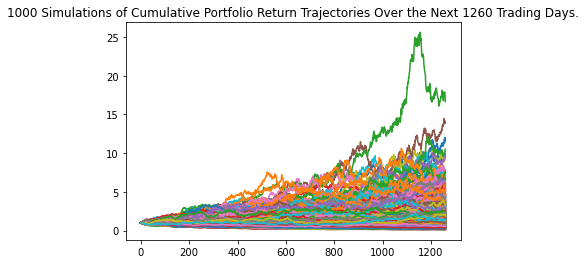

In [19]:
# Plot simulation outcomes
# YOUR CODE HERE!

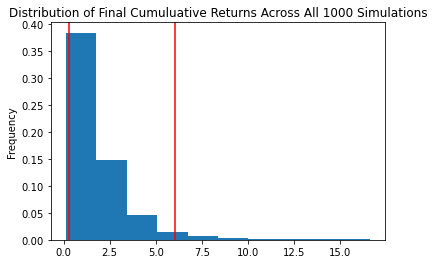

In [20]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
print(nike_tbl)

count           1000.000000
mean               1.815723
std                1.629422
min                0.113515
25%                0.802710
50%                1.365172
75%                2.153314
max               16.651508
95% CI Lower       0.296878
95% CI Upper       6.028861
Name: 1260, dtype: float64


In [22]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $15,000 investments
# YOUR CODE HERE!

# Print results
# YOUR CODE HERE!

There is a 95% chance that an initial investment of $15,000 in the portfolio over the next 5 years will end within in the range of $4453.17 and $90432.92.


### Simulate five year portfolio growth with 60% Exxon stock

In [23]:
# Configuring a Monte Carlo simulation to forecast five years cumulative returns
# YOUR CODE HERE!

# Printing the simulation input data
MC_exxon.portfolio_data

NKE                                   \
                             open    high     low   close   volume   
2015-05-01 00:00:00-04:00  49.940  50.410  49.705  50.385  5715970   
2015-05-04 00:00:00-04:00  50.500  50.600  50.242  50.410  3606368   
2015-05-05 00:00:00-04:00  50.215  50.435  50.130  50.205  3948804   
2015-05-06 00:00:00-04:00  50.135  50.500  25.010  50.125  4612302   
2015-05-07 00:00:00-04:00  25.005  50.795  25.005  50.730  4586904   
...                           ...     ...     ...     ...      ...   
2020-04-27 00:00:00-04:00  88.380  89.870  87.310  89.330  6204274   
2020-04-28 00:00:00-04:00  90.550  90.710  88.630  88.810  4483633   
2020-04-29 00:00:00-04:00  90.000  91.390  87.830  88.040  7944474   
2020-04-30 00:00:00-04:00  87.000  88.000  86.505  87.180  6528373   
2020-05-01 00:00:00-04:00  85.670  86.105  84.810  85.540  5357539   

                                            T                         \
                          daily_return   open   high     low   close   
2015-05-01 00:00:00-04:00          NaN  34.56  34.72  34.130  34.420   
2015-05-04 00:00:00-04:00     0.000496  34.41  34.71  34.250  34.530   
2015-05-05 00:00:00-04:00    -0.004067  34.49  34.58  33.660  33.720   
2015-05-06 00:00:00-04:00    -0.001593  33.71  33.79  33.080  33.395   
2015-05-07 00:00:00-04:00     0.012070  33.25  33.56  33.110  33.370   
...                                ...    ...    ...     ...     ...   
2020-04-27 00:00:00-04:00     0.010635  29.99  30.68  29.740  30.540   
2020-04-28 00:00:00-04:00    -0.005821  31.00  31.12  30.615  30.650   
2020-04-29 00:00:00-04:00    -0.008670  31.13  31.87  31.070  31.440   
2020-04-30 00:00:00-04:00    -0.009768  31.00  31.05  30.280  30.450   
2020-05-01 00:00:00-04:00    -0.018812  30.77  30.79  29.750  29.900   

                                                    XOM                        \
                             volume daily_return   open   high    low   close   
2015-05-01 00:00:00-04:00  28678372          NaN  87.85  88.95  87.70  88.840   
2015-05-04 00:00:00-04:00  18684532     0.003196  89.42  89.88  88.95  89.090   
2015-05-05 00:00:00-04:00  29405889    -0.023458  89.97  90.09  88.52  88.615   
2015-05-06 00:00:00-04:00  27386910    -0.009638  89.65  89.96  87.79  88.220   
2015-05-07 00:00:00-04:00  19815760    -0.000749  88.00  88.10  86.92  87.610   
...                             ...          ...    ...    ...    ...     ...   
2020-04-27 00:00:00-04:00  58376488     0.027937  43.59  44.32  42.23  43.920   
2020-04-28 00:00:00-04:00  55107142     0.003602  44.37  45.39  44.11  44.980   
2020-04-29 00:00:00-04:00  57547301     0.025775  46.26  47.60  46.16  47.480   
2020-04-30 00:00:00-04:00  63467447    -0.031489  47.68  47.68  45.77  46.400   
2020-05-01 00:00:00-04:00  69100348    -0.018062  45.63  46.39  43.00  43.170   

                                                  
                             volume daily_return  
2015-05-01 00:00:00-04:00  10232059          NaN  
2015-05-04 00:00:00-04:00   8023849     0.002814  
2015-05-05 00:00:00-04:00   9605254    -0.005332  
2015-05-06 00:00:00-04:00   9280271    -0.004457  
2015-05-07 00:00:00-04:00   8034370    -0.006915  
...                             ...          ...  
2020-04-27 00:00:00-04:00  26955553     0.004115  
2020-04-28 00:00:00-04:00  24393001     0.024135  
2020-04-29 00:00:00-04:00  26882843     0.055580  
2020-04-30 00:00:00-04:00  28454300    -0.022746  
2020-05-01 00:00:00-04:00  32688912    -0.069612  

[1260 rows x 18 columns]

In [24]:
# Run a Monte Carlo simulation to forecast five years cumulative returns with 60% Exxon stock
# YOUR CODE HERE!

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005935,0.999270,1.019777,0.973132,1.014106,1.004037,1.015798,1.001895,0.996910,0.996200,...,1.000934,0.992132,1.019853,0.997518,1.013702,1.011027,0.985784,0.998192,1.002054,0.998971
2,1.011781,0.993826,1.021719,0.982821,1.004174,0.998413,1.009221,0.989444,0.987226,1.014775,...,1.011004,0.989750,1.022320,0.989763,1.011195,1.015485,0.984691,0.994331,1.012497,1.008114
3,1.016531,0.994511,1.012890,0.988160,1.003233,0.983748,1.009504,0.992371,0.990394,1.018910,...,1.017628,0.980306,1.042278,0.986909,1.000587,1.033386,0.971424,0.990764,1.026653,1.008847
4,1.022563,0.977040,1.013982,1.003521,1.004580,0.970523,1.017485,0.997373,0.984034,1.005077,...,1.005215,0.971848,1.060583,0.981890,1.025458,1.016732,0.970948,0.996089,1.034105,1.014540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.386263,2.018712,0.374140,0.793316,1.250005,1.160018,0.658722,0.436678,0.562495,0.609418,...,1.179484,0.813153,0.778126,0.693218,1.028155,0.516915,1.013091,0.946394,1.285958,0.812276
1257,0.390384,2.015401,0.382967,0.798973,1.240981,1.147900,0.645449,0.440137,0.556300,0.615244,...,1.185518,0.813293,0.773311,0.696294,1.023810,0.508038,1.020050,0.952549,1.297022,0.810711
1258,0.397945,1.965985,0.378203,0.797010,1.244146,1.138195,0.656229,0.430566,0.565349,0.613773,...,1.162158,0.797181,0.767107,0.683525,1.035067,0.513769,1.013337,0.950388,1.287200,0.821837
1259,0.402232,1.977693,0.375574,0.795837,1.231501,1.117941,0.664316,0.435016,0.556473,0.619290,...,1.151782,0.790438,0.768746,0.682580,1.059676,0.508407,1.018750,0.964443,1.291915,0.829264


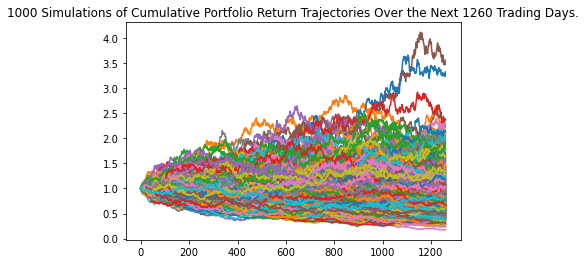

In [25]:
# Plot simulation outcomes
# YOUR CODE HERE!

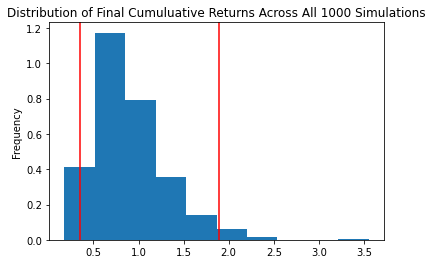

In [26]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [27]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
print(exxon_tbl)

count           1000.000000
mean               0.896720
std                0.399085
min                0.177209
25%                0.616254
50%                0.817877
75%                1.090610
max                3.552330
95% CI Lower       0.346638
95% CI Upper       1.888543
Name: 1260, dtype: float64


In [28]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $15,000 investments
# YOUR CODE HERE!

# Print results
# YOUR CODE HERE!

There is a 95% chance that an initial investment of $15,000 in the portfolio over the next 5 years will end within in the range of $5199.57 and $28328.15.


### Summarize findings across all 4 simulations

YOUR ANSWER HERE!